## Data Science and Machine Learning Internship Program

### **Assignment-7**

**Problem Statement 1:** Build a text classification RNN ( Recurrent Neural Network) model using IMDB dataset. Import the IMDB dataset using tensorflow_datasets and perform the following tasks.

### Task 1: *Import the required libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
import tensorflow_datasets as tfds


e:\old files\data sci\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


*Find available datasets*

In [2]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

### Task 2: *Shuffle the data for training and create batches of text and label pairs*

*Load and Prepare the Dataset*

In [3]:
# Load the IMDB dataset
(train_data, test_data), info = tfds.load('imdb_reviews', 
                                          split=['train', 'test'], 
                                          with_info=True, 
                                          as_supervised=True)

# Define batch size and buffer size for shuffling
BATCH_SIZE = 64
BUFFER_SIZE = 10000

# Shuffle and batch the training data
train_data = train_data.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_data = test_data.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)


Dl Completed...: 100%|██████████| 1/1 [00:52<00:00, 52.34s/ url]


Dataset imdb_reviews downloaded and prepared to C:\Users\GREAT SPEED\tensorflow_datasets\imdb_reviews\plain_text\1.0.0. Subsequent calls will reuse this data.


### Task 3: *Encode the text data*

In [40]:
# Define the TextVectorization layer
max_features = 10000  # Maximum number of words to consider in the vocabulary
embedding_dim = 128  # Dimension of the dense embedding

vectorize_layer = TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=250)

# Adapt the layer to the training data
train_text = train_data.map(lambda x, y: x)
vectorize_layer.adapt(train_text)


### Task 4:   *Build a sequential model using tf.keras.Sequential function*

In [38]:
tf.keras.Sequential?

Init signature: tf.keras.Sequential(*args, **kwargs)
Docstring:     
`Sequential` groups a linear stack of layers into a `Model`.

Examples:

```python
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))

# Note that you can also omit the initial `Input`.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = keras.Sequential()
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify an `Input`, the model gets built
# continuously as you are adding layers:
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))
len(model.weights)  # Returns "2"

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually build your model by calling
# `build(batch_input_shape)`:
model = keras.Sequential()
model.add(keras.layers.Dense(8

In [39]:
layers.Embedding?

Init signature:
layers.Embedding(
    input_dim,
    output_dim,
    embeddings_initializer='uniform',
    embeddings_regularizer=None,
    embeddings_constraint=None,
    mask_zero=False,
    weights=None,
    lora_rank=None,
    **kwargs,
)
Docstring:     
Turns positive integers (indexes) into dense vectors of fixed size.

e.g. `[[4], [20]] -> [[0.25, 0.1], [0.6, -0.2]]`

This layer can only be used on positive integer inputs of a fixed range.

Example:

>>> model = keras.Sequential()
>>> model.add(keras.layers.Embedding(1000, 64))
>>> # The model will take as input an integer matrix of size (batch,
>>> # input_length), and the largest integer (i.e. word index) in the input
>>> # should be no larger than 999 (vocabulary size).
>>> # Now model.output_shape is (None, 10, 64), where `None` is the batch
>>> # dimension.
>>> input_array = np.random.randint(1000, size=(32, 10))
>>> model.compile('rmsprop', 'mse')
>>> output_array = model.predict(input_array)
>>> print(output_array.shape)


In [41]:
# Build the model
model = tf.keras.Sequential([
    vectorize_layer,
    layers.Embedding(max_features,embedding_dim),
    layers.SimpleRNN(embedding_dim),
    layers.Dense(1, activation='sigmoid')
])

# Summarize the model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Task 5: *Compile the model*

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


### Task 6: *Train the model using train dataset*

In [43]:
# Train the model
history = model.fit(train_data, epochs=12, validation_data=test_data)

Epoch 1/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 185s 420ms/step - accuracy: 0.4993 - loss: 0.6973 - val_accuracy: 0.5001 - val_loss: 0.6939
Epoch 2/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 123s 313ms/step - accuracy: 0.5112 - loss: 0.6953 - val_accuracy: 0.4990 - val_loss: 0.6948
Epoch 3/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 317ms/step - accuracy: 0.5343 - loss: 0.6901 - val_accuracy: 0.5030 - val_loss: 0.6958
Epoch 4/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 99s 252ms/step - accuracy: 0.5518 - loss: 0.6736 - val_accuracy: 0.5078 - val_loss: 0.7063
Epoch 5/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 90s 230ms/step - accuracy: 0.5645 - loss: 0.6494 - val_accuracy: 0.5049 - val_loss: 0.7365
Epoch 6/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 95s 242ms/step - accuracy: 0.5951 - loss: 0.6112 - val_accuracy: 0.5032 - val_loss: 0.7552
Epoch 7/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 110s 279ms/step - accuracy: 0.6143 - loss: 0.5778 - val_accuracy: 0.5069 - val_loss: 0.8094
Epoch 8/12
391/391 ━━━━━━━━━━━━━━━━━━━━ 101s 259ms/step - accuracy: 0.6210 - lo

### Task 7: *Test the data using tset dataset and evaluate the model by passing a sentence*

In [44]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_data)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.4964 - loss: 1.0312
Test Loss: 1.0385682582855225
Test Accuracy: 0.49823999404907227


In [45]:
print(model.input_shape)

(None,)


In [46]:
# Test the model with a sample sentence
sample_sentence = "The movie was fantastic! I really enjoyed it."
sample_sentence_vectorized = vectorize_layer(tf.constant([sample_sentence]))

# Ensure the input is a batch
sample_sentence_vectorized = tf.expand_dims(sample_sentence_vectorized, 1)

# Check the shape and dtype
print(f'Sample input shape after expanding dims: {sample_sentence_vectorized.shape}')
print(f'Sample input dtype: {sample_sentence_vectorized.dtype}')

# Make predictions
prediction = model.predict(sample_sentence_vectorized)
print(f'Sentiment score: {prediction[0][0]}')

# Determine the sentiment label
sentiment_label = 'Positive' if prediction[0][0] >= 0.0 else 'Negative'
print(f'Sentiment: {sentiment_label}')


Sample input shape after expanding dims: (1, 1, 250)
Sample input dtype: <dtype: 'int64'>


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_2_1/Cast:0", shape=(1, 1, 250), dtype=string). Expected shape (None,), but input has incompatible shape (1, 1, 250)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 1, 250), dtype=int64)
  • training=False
  • mask=None

**Problem Statement 2:** Sumanth wants to build an flowers image classification CNN model which can take a flower image as input and prints the name of flower.

*Dataset Description:* The dataset consist of 3,700 photos of flowers. The dataset contains five sub-directories, one per class:

• daisy
• dandelion
• roses
• sunflowers
• tulips

### Task 1: *Import all the required libraries*

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory


### Task 2: *Download the flowers data from URL*

using the Keras; and analyzing the images present in the dataset visualization

In [2]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   untar=True)
data_dir = pathlib.Path(data_dir)


In [3]:
# Count the number of images in each category
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'Total images: {image_count}')

class_names = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
print(f'Class names: {class_names}')


Total images: 3670
Class names: ['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


### Task 3: *Prepare the data by specifying the image resolution and batch size. Also, Splitting the dataset into training and validation datasets in 80:20 ratio*

In [4]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


### Task 4: *Plot a sample image attributed to each class name present in the original dataset.*

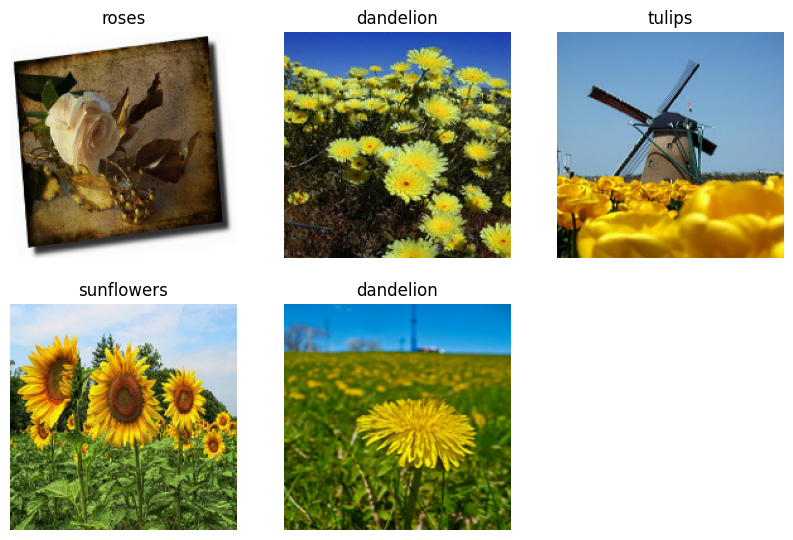

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(5):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()


### Task 5: *Autotune the data using cache().shuffle().prefetch() function; Also, normalize the data by deviding it with a number*

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


### Task 6: *Build a sequential CNN model*

In [12]:
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),# 64
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'), # 128
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), # 256
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),# 512
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'), # 1024
    layers.Dense(len(class_names), activation='softmax')
])


### Task 7: *Compile the model and print model summary*

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 89, 89, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 18, 18, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425,317 (5.44 MB)

 Trainable params: 1,425,317 (5.44 MB)

 Non-trainable params: 0 (0.00 B)

### Task 8: *Train and validate the model and plot the validation results using a line plot*

In [14]:
epochs = 8
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 552ms/step - accuracy: 0.2352 - loss: 1.6055 - val_accuracy: 0.2398 - val_loss: 1.6031
Epoch 2/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 74s 469ms/step - accuracy: 0.2387 - loss: 1.6028 - val_accuracy: 0.2398 - val_loss: 1.6020
Epoch 3/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 471ms/step - accuracy: 0.2493 - loss: 1.5997 - val_accuracy: 0.2398 - val_loss: 1.6024
Epoch 4/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 43s 472ms/step - accuracy: 0.2477 - loss: 1.6003 - val_accuracy: 0.2398 - val_loss: 1.6018
Epoch 5/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 83s 478ms/step - accuracy: 0.2409 - loss: 1.6032 - val_accuracy: 0.2398 - val_loss: 1.6032
Epoch 6/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 465ms/step - accuracy: 0.2519 - loss: 1.5963 - val_accuracy: 0.2398 - val_loss: 1.6017
Epoch 7/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 475ms/step - accuracy: 0.2447 - loss: 1.5997 - val_accuracy: 0.2398 - val_loss: 1.6019
Epoch 8/8
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 478ms/step - accuracy: 0.2483 - loss: 1.5997 - val_accuracy: 0.

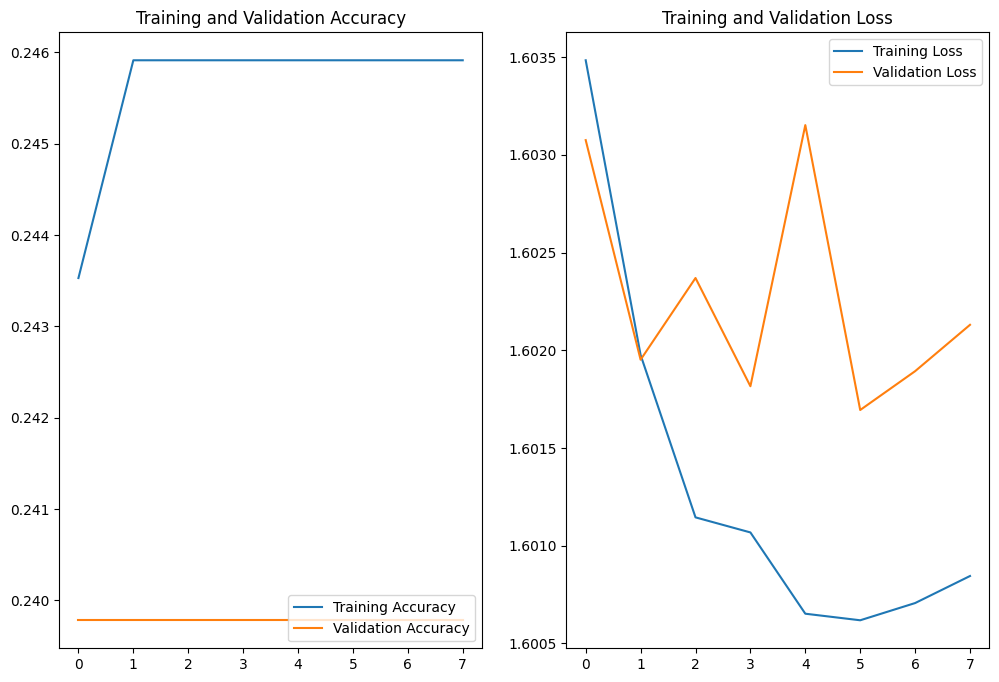

In [15]:
# Plot the training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Task 9: *Feed the system with an image of a flower and print the prediction along with the accuracy*

In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    
    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    
    print(f"This image most likely belongs to {class_names[np.argmax(score)]} with a {100 * np.max(score):.2f} percent confidence.")

# Provide the path to the image you want to test
# img_path = 'flowers_name_in_english.jpg'
img_path_ = "pexels-jonaskakaroto-736230.jpg"
predict_image(img_path_)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
This image most likely belongs to dandelion with a 22.92 percent confidence.
